<a href="https://colab.research.google.com/github/vkjadon/imageProcessing/blob/main/transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

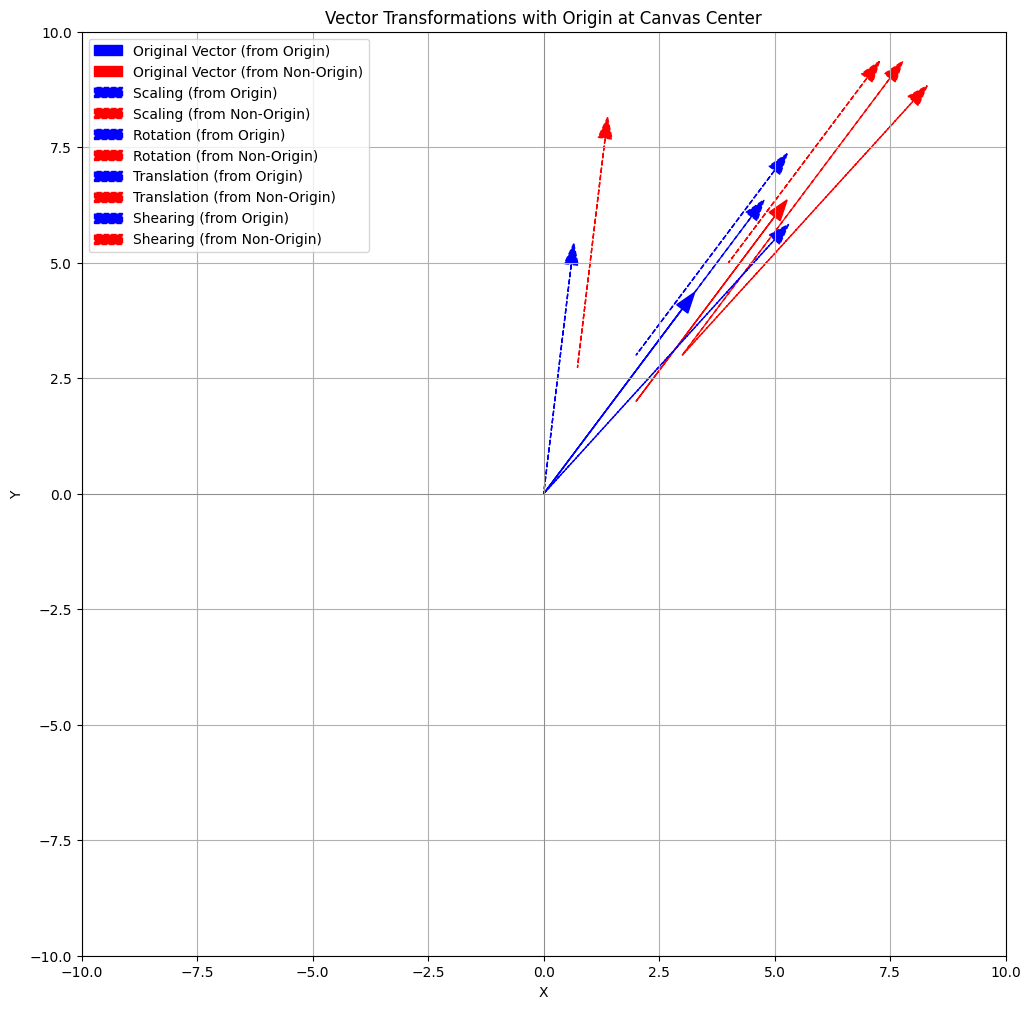

In [ ]:
# Function to apply a transformation matrix to a vector
def transform_vector(start_point, vector, transformation_matrix):
    # Convert to homogeneous coordinates by appending 1
    start_homogeneous = np.array([*start_point, 1])
    end_homogeneous = np.array([start_point[0] + vector[0], start_point[1] + vector[1], 1])

    # Apply transformation
    transformed_start = transformation_matrix @ start_homogeneous
    transformed_end = transformation_matrix @ end_homogeneous

    # Return transformed start and end points (in 2D space)
    return transformed_start[:2], transformed_end[:2]

# Define a variety of transformation matrices
transformations = {
    'Scaling': np.array([[1.5, 0, 0], [0, 1.5, 0], [0, 0, 1]]),
    'Rotation': np.array([[0.866, -0.5, 0], [0.5, 0.866, 0], [0, 0, 1]]),  # Rotate by 30 degrees
    'Translation': np.array([[1, 0, 2], [0, 1, 3], [0, 0, 1]]),  # Shift by (2, 3)
    'Shearing': np.array([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]])  # Shear factors
}

# Define vectors
origin = (0, 0)  # Origin point
non_origin_start = (2, 2)  # Arbitrary non-origin starting point
vector = (3, 4)  # Vector from start point

# Plotting setup
plt.figure(figsize=(12, 12))
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.title("Vector Transformations with Origin at Canvas Center")

# Plot original vectors
plt.arrow(origin[0], origin[1], vector[0], vector[1], head_width=0.3, color="blue", label="Original Vector (from Origin)")
plt.arrow(non_origin_start[0], non_origin_start[1], vector[0], vector[1], head_width=0.3, color="red", label="Original Vector (from Non-Origin)")

# Apply each transformation and plot the resulting vectors with arrowheads
for name, transformation_matrix in transformations.items():
    # Transform both the origin-based and non-origin-based vectors
    transformed_origin_start, transformed_origin_end = transform_vector(origin, vector, transformation_matrix)
    transformed_non_origin_start, transformed_non_origin_end = transform_vector(non_origin_start, vector, transformation_matrix)

    # Plot the transformed vectors
    plt.arrow(transformed_origin_start[0], transformed_origin_start[1],
              transformed_origin_end[0] - transformed_origin_start[0],
              transformed_origin_end[1] - transformed_origin_start[1],
              head_width=0.3, linestyle='--', color="blue", label=f"{name} (from Origin)")

    plt.arrow(transformed_non_origin_start[0], transformed_non_origin_start[1],
              transformed_non_origin_end[0] - transformed_non_origin_start[0],
              transformed_non_origin_end[1] - transformed_non_origin_start[1],
              head_width=0.3, linestyle='--', color="red", label=f"{name} (from Non-Origin)")

# Only display unique labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


In [ ]:
# Define the original rectangle's vertices
def create_vertices(center_x, center_y, h, w):
    vertices = np.array([
        [center_x - w/2, center_y - h/2],
        [center_x + w/2, center_y - h/2],
        [center_x + w/2, center_y + h/2],
        [center_x - w/2, center_y + h/2],
        [center_x - w/2, center_y - h/2]  # Close the rectangle
    ])
    return vertices

In [ ]:
# Plot function
def plot_square(vertices, title="Transformed Square", lc="black", lt="-"):
    plt.plot(vertices[:, 0], vertices[:, 1], marker='o', color=lc, linestyle=lt, linewidth=2)
    x_coords, y_coords = vertices[:4, 0], vertices[:4, 1]
    center_x, center_y = np.mean(x_coords), np.mean(y_coords)
    plt.plot(center_x, center_y, 'ro', markersize=8, label='Center')
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.grid(True)
    # plt.show()

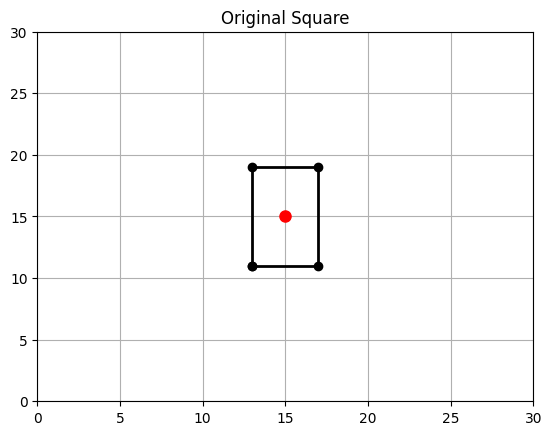

In [ ]:
# Create original square and plot it
original_square = create_vertices(15, 15, 8, 4)
plot_square(original_square, "Original Square", lt='-')

In [ ]:
# Function to apply transformation to vertices
def transform_vertices(vertices, transformation_matrix):
    transformed = []
    for x, y in vertices:
        # Apply transformation using matrix multiplication
        vector = np.array([x, y])
        transformed_vector = transformation_matrix @ vector
        transformed.append(transformed_vector[:])
        print(f"Original: ({x}, {y}), Transformed: ({transformed_vector[0]}, {transformed_vector[1]})")
    print(f"Type of transformed: {type(transformed)}")
    return np.array(transformed)

The expression transformed_vector[:2] is slicing the transformed_vector to get only the first two elements.
The append function then adds this (x, y) pair to the transformed list.

Original: (13.0, 11.0), Transformed: (19.5, 11.0)
Original: (17.0, 11.0), Transformed: (25.5, 11.0)
Original: (17.0, 19.0), Transformed: (25.5, 19.0)
Original: (13.0, 19.0), Transformed: (19.5, 19.0)
Original: (13.0, 11.0), Transformed: (19.5, 11.0)
Type of transformed: <class 'list'>
Type of Square <class 'numpy.ndarray'>
Scaled Square: [[19.5 11. ]
 [25.5 11. ]
 [25.5 19. ]
 [19.5 19. ]
 [19.5 11. ]]


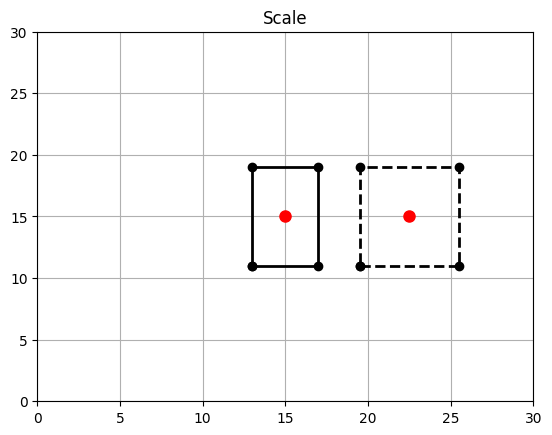

In [ ]:
sx, sy = 1.5, 1
scaling_matrix = np.array([
    [sx, 0],
    [0, sy]
])
scaled_square = transform_vertices(original_square, scaling_matrix)
print(f"Type of Square {type(scaled_square)}")
print("Scaled Square:", scaled_square)
plot_square(original_square, "Original Square")
plot_square(scaled_square, "Scale", lt='--')
plt.show()

Original: (13.0, 11.0), Transformed: (18.5, 13.6)
Original: (17.0, 11.0), Transformed: (22.5, 14.4)
Original: (17.0, 19.0), Transformed: (26.5, 22.4)
Original: (13.0, 19.0), Transformed: (22.5, 21.6)
Original: (13.0, 11.0), Transformed: (18.5, 13.6)
Type of transformed: <class 'list'>


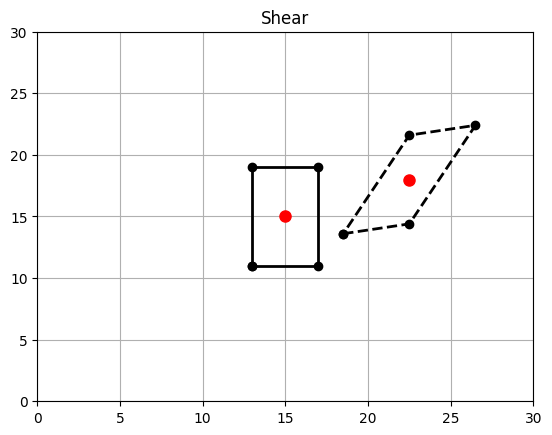

In [ ]:
sx, sy = 0.5, 0.2
shear_matrix = np.array([
    [1, sx],
    [sy, 1]
])
sheared_square = transform_vertices(original_square, shear_matrix)
plot_square(original_square, "Original Square")
plot_square(sheared_square, "Shear", lt='--')
plt.show()

Original: (13.0, 11.0), Transformed: (9.71002624563016, 13.98983167551252)
Original: (17.0, 11.0), Transformed: (13.573729550786434, 15.025107855922602)
Original: (17.0, 19.0), Transformed: (11.503177189966268, 22.752514466235148)
Original: (13.0, 19.0), Transformed: (7.639473884809994, 21.717238285825065)
Original: (13.0, 11.0), Transformed: (9.71002624563016, 13.98983167551252)
Type of transformed: <class 'list'>


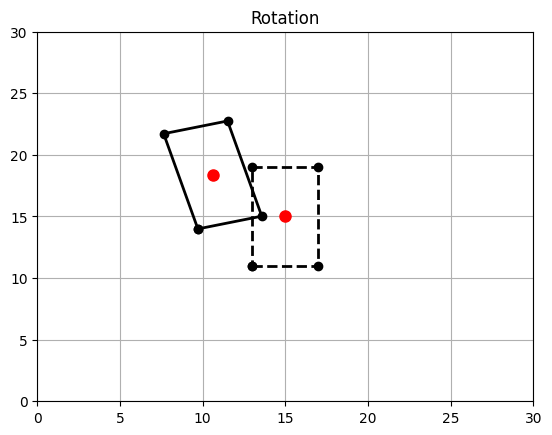

In [ ]:
angle = np.radians(15)
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle),  np.cos(angle)]
])
rotated_square = transform_vertices(original_square, rotation_matrix)
plot_square(rotated_square)
plot_square(original_square, "Rotation", lt='--')
plt.show()

In [ ]:
# Define transformation matrices
# 1. Translation
tx, ty = 5, 3
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
translated_square = transform_vertices(original_square, translation_matrix)
plot_square(translated_square, "Translated Square")
plot_square(original_square, "Original Square")
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [ ]:
# Function to apply transformation to vertices
def transform_vertices(vertices, transformation_matrix):
    transformed = []
    for x, y in vertices:
        # Apply transformation using matrix multiplication
        vector = np.array([x, y, 1])
        transformed_vector = transformation_matrix @ vector
        transformed.append(transformed_vector[:2])
    return np.array(transformed)

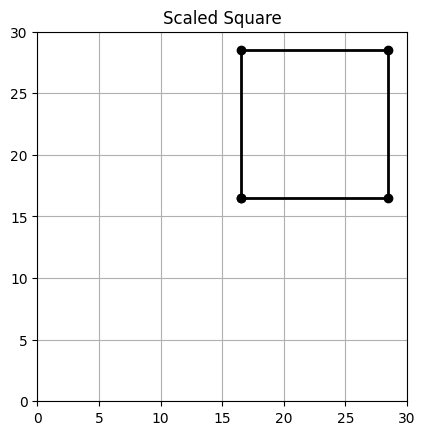

In [ ]:
# 2. Scaling
sx, sy = 1.5, 1.5
scaling_matrix = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])
scaled_square = transform_vertices(original_square, scaling_matrix)
plot_square(scaled_square, "Scaled Square")

In [ ]:
# 4. Shearing
sx, sy = 0.5, 0.2
shear_matrix = np.array([
    [1, sx, 0],
    [sy, 1, 0],
    [0, 0, 1]
])
sheared_square = transform_vertices(original_square, shear_matrix)
plot_square(sheared_square, "Sheared Square")

In [ ]:
# 3. Rotation by 45 degrees
angle = np.radians(15)
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle),  np.cos(angle), 0],
    [0, 0, 1]
])
rotated_square = transform_vertices(original_square, rotation_matrix)
plot_square(rotated_square, "Rotated Square")

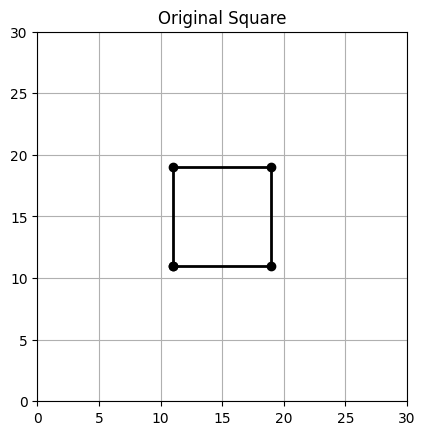

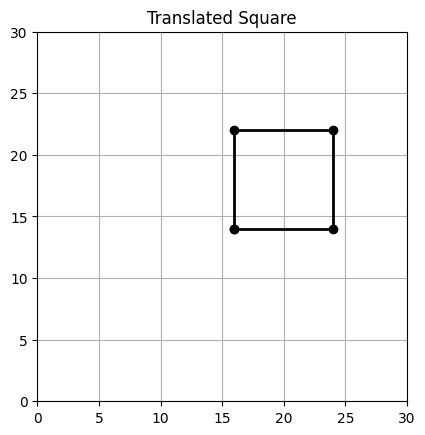

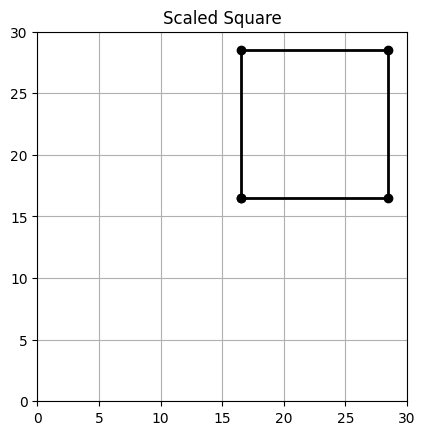

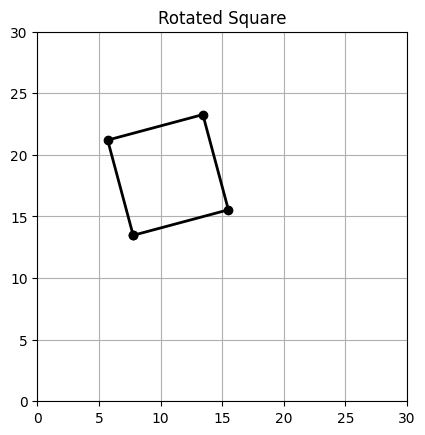

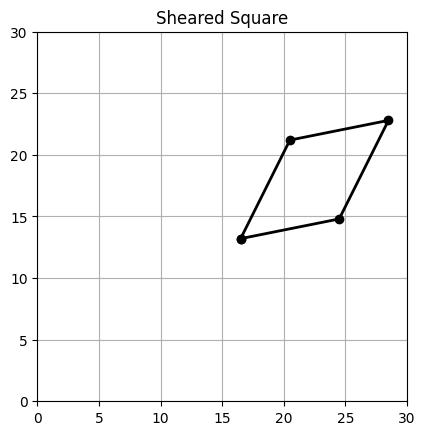

In [ ]:
# Define transformation matrices
# 1. Translation
tx, ty = 5, 3
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
translated_square = transform_vertices(original_square, translation_matrix)
plot_square(translated_square, "Translated Square")

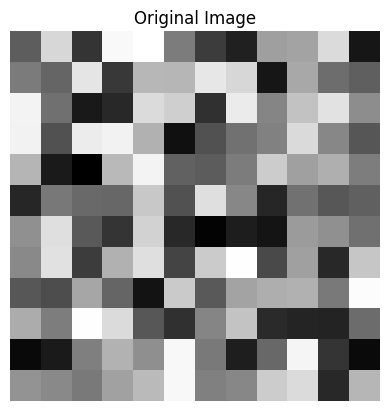

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample 12x12 image (e.g., a simple gradient or any custom image)
image = np.random.rand(12, 12)  # Replace with your image data if available

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


The basic transformations use 3x3 matrices to transform the (x, y) coordinates in homogeneous form, (x,y,1)(x,y,1), where the third component allows for translation.

In [ ]:
def apply_transformation(matrix, x, y):
    # Multiply the 3x3 matrix with the [x, y, 1] vector
    transformed = [
        matrix[0][0] * x + matrix[0][1] * y + matrix[0][2],
        matrix[1][0] * x + matrix[1][1] * y + matrix[1][2],
        matrix[2][0] * x + matrix[2][1] * y + matrix[2][2]
    ]
    return int(transformed[0]), int(transformed[1])


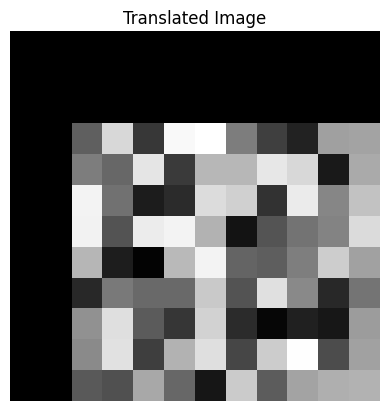

In [ ]:
def translate_image(image, tx, ty):
    translation_matrix = [
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ]
    new_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            new_x, new_y = apply_transformation(translation_matrix, x, y)
            if 0 <= new_x < image.shape[0] and 0 <= new_y < image.shape[1]:
                new_image[new_x, new_y] = image[x, y]
    return new_image

translated_image = translate_image(image, 3, 2)
plt.imshow(translated_image, cmap='gray')
plt.title("Translated Image")
plt.axis("off")
plt.show()

In [ ]:
from scipy.ndimage import affine_transform

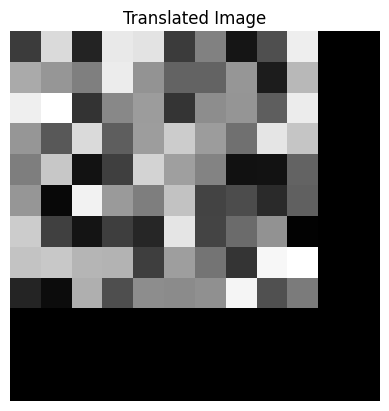

In [ ]:
def translate_image(image, tx, ty):
    # Define the translation matrix
    transform_matrix = np.array([[1, 0, tx],
                                 [0, 1, ty],
                                 [0, 0, 1]])

    # Apply affine transformation
    translated_image = affine_transform(image, transform_matrix[:2, :2], offset=[tx, ty], mode='constant', cval=0)
    return translated_image

# Translate the image by (3, 2)
translated_image = translate_image(image, 3, 2)
plt.imshow(translated_image, cmap='gray')
plt.title("Translated Image")
plt.axis("off")
plt.show()


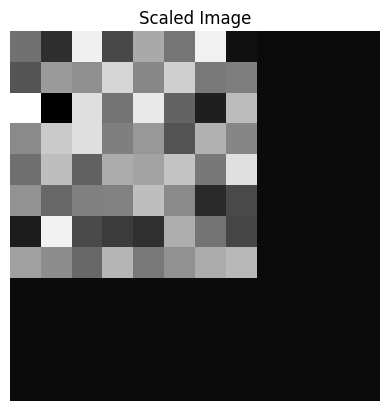

In [ ]:
def scale_image(image, sx, sy):
    # Define the scaling matrix
    transform_matrix = np.array([[sx, 0, 0],
                                 [0, sy, 0],
                                 [0, 0, 1]])

    # Apply affine transformation
    scaled_image = affine_transform(image, transform_matrix[:2, :2], offset=0, mode='constant', cval=0)
    return scaled_image

# Scale the image by (1.5, 1.5)
scaled_image = scale_image(image, 1.5, 1.5)
plt.imshow(scaled_image, cmap='gray')
plt.title("Scaled Image")
plt.axis("off")
plt.show()


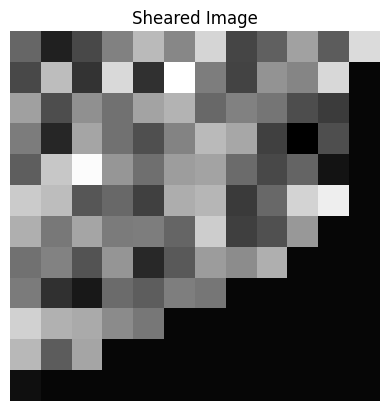

In [ ]:
def shear_image(image, sx, sy):
    # Define the shearing matrix
    transform_matrix = np.array([[1, sx, 0],
                                 [sy, 1, 0],
                                 [0, 0, 1]])

    # Apply affine transformation
    sheared_image = affine_transform(image, transform_matrix[:2, :2], offset=0, mode='constant', cval=0)
    return sheared_image

# Shear the image by (0.5, 0.2)
sheared_image = shear_image(image, 0.5, 0.2)
plt.imshow(sheared_image, cmap='gray')
plt.title("Sheared Image")
plt.axis("off")
plt.show()


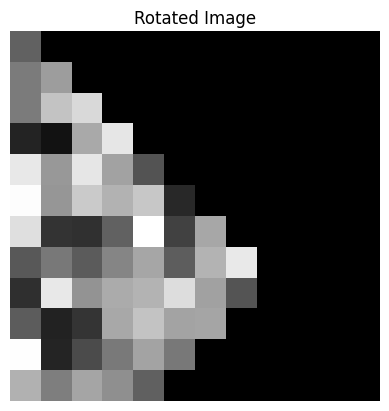

In [ ]:
import math

def rotate_image(image, angle):
    # Convert angle to radians
    angle_rad = math.radians(angle)

    # Define the rotation matrix
    transform_matrix = np.array([[math.cos(angle_rad), -math.sin(angle_rad), 0],
                                 [math.sin(angle_rad), math.cos(angle_rad), 0],
                                 [0, 0, 1]])

    # Apply affine transformation
    rotated_image = affine_transform(image, transform_matrix[:2, :2], offset=0, mode='constant', cval=0)
    return rotated_image

# Rotate the image by 45 degrees
rotated_image = rotate_image(image, 45)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")
plt.axis("off")
plt.show()


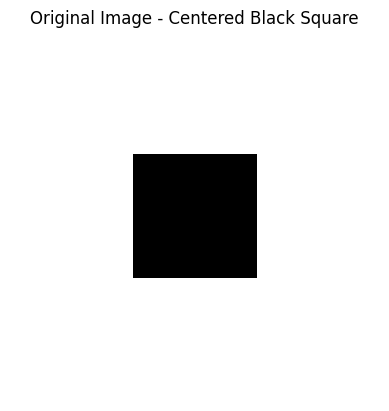

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a blank canvas with a centered black square
canvas_size = 24  # Large canvas size
square_size = 8   # Size of the square
canvas = np.ones((canvas_size, canvas_size))  # White background (1s)

# Define the top-left corner of the square to center it on the canvas
start = (canvas_size - square_size) // 2
end = start + square_size
canvas[start:end, start:end] = 0  # Black square in the center (0s)

plt.imshow(canvas, cmap='gray')
plt.title("Original Image - Centered Black Square")
plt.axis("off")
plt.show()


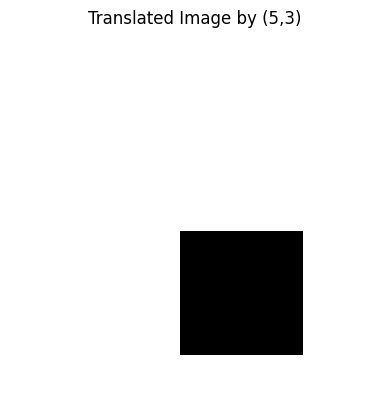

In [ ]:
def translate_image_with_expansion(image, tx, ty):
    translation_matrix = [
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ]
    new_image = np.ones_like(image)  # White background

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] == 0:  # Only apply to black square pixels
                new_x, new_y = apply_transformation(translation_matrix, x, y)
                if 0 <= new_x < new_image.shape[0] and 0 <= new_y < new_image.shape[1]:
                    new_image[new_x, new_y] = 0

    plt.imshow(new_image, cmap='gray')
    plt.title(f"Translated Image by ({tx},{ty})")
    plt.axis("off")
    plt.show()

translate_image_with_expansion(canvas, 5, 3)


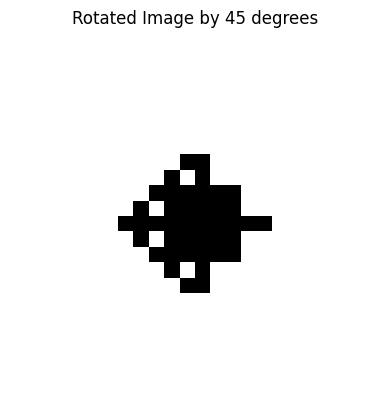

In [ ]:
def rotate_image_with_expansion(image, angle):
    angle_rad = np.radians(angle)
    rotation_matrix = [
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad), np.cos(angle_rad), 0],
        [0, 0, 1]
    ]
    new_image = np.ones_like(image)
    center_x, center_y = canvas_size // 2, canvas_size // 2

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] == 0:
                new_x, new_y = apply_transformation(rotation_matrix, x - center_x, y - center_y)
                new_x, new_y = int(new_x + center_x), int(new_y + center_y)
                if 0 <= new_x < new_image.shape[0] and 0 <= new_y < new_image.shape[1]:
                    new_image[new_x, new_y] = 0

    plt.imshow(new_image, cmap='gray')
    plt.title(f"Rotated Image by {angle} degrees")
    plt.axis("off")
    plt.show()

rotate_image_with_expansion(canvas, 45)


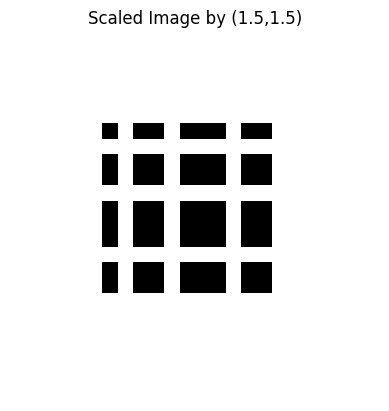

In [ ]:
def scale_image_with_expansion(image, sx, sy):
    scaling_matrix = [
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ]
    new_image = np.ones_like(image)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] == 0:
                new_x, new_y = apply_transformation(scaling_matrix, x - canvas_size // 2, y - canvas_size // 2)
                new_x, new_y = int(new_x + canvas_size // 2), int(new_y + canvas_size // 2)
                if 0 <= new_x < new_image.shape[0] and 0 <= new_y < new_image.shape[1]:
                    new_image[new_x, new_y] = 0

    plt.imshow(new_image, cmap='gray')
    plt.title(f"Scaled Image by ({sx},{sy})")
    plt.axis("off")
    plt.show()

scale_image_with_expansion(canvas, 1.5, 1.5)


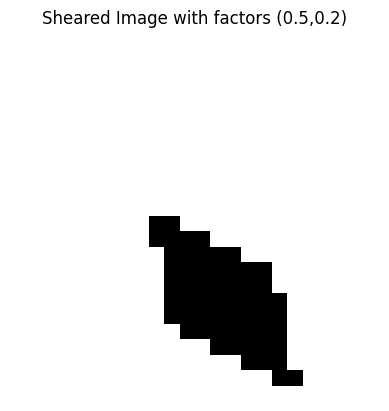

In [ ]:
def shear_image_with_expansion(image, sx, sy):
    shear_matrix = [
        [1, sx, 0],
        [sy, 1, 0],
        [0, 0, 1]
    ]
    new_image = np.ones_like(image)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] == 0:
                new_x, new_y = apply_transformation(shear_matrix, x, y)
                if 0 <= new_x < new_image.shape[0] and 0 <= new_y < new_image.shape[1]:
                    new_image[new_x, new_y] = 0

    plt.imshow(new_image, cmap='gray')
    plt.title(f"Sheared Image with factors ({sx},{sy})")
    plt.axis("off")
    plt.show()

shear_image_with_expansion(canvas, 0.5, 0.2)